# Predict heart disease using machine learning

This notebook (QA) leverages Python-based ML libraries to build a ML-model that predicts if a person has heart diseases or not
based on their medical attributes.

Steps:
1. Define problem statement
2. Understand Data
3. Model Evaluation (to choose the most appropriate one)
4. Determine features
5. Modelling
6. Experimentation

### 1. Define Problem Statement

> Given clinical attributes of a patient, predict whether they have heart disease or not?

### 2. Understand Data : [Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)
### 3. Evaluation
> Reach 95% accuracy at predicting during Proof-Of-Concept and then pursue the project.

### 4. Features

**Create data dictionary**
- **age:** The person’s age in years
- **sex:** The person’s sex (1 = male, 0 = female)
- **cp:** Chest pain type
  - Value 0: asymptomatic
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: typical angina
- **trestbps:** The person’s resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person’s cholesterol measurement in mg/dl
- **fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results
  - Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  - Value 1: normal
  - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- **thalach:** The person’s maximum heart rate achieved
- **exang:** Exercise-induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment
  - Value 0: downsloping
  - Value 1: flat
  - Value 2: upsloping
- **ca:** The number of major vessels (0–3)
- **thal:** A blood disorder called thalassemia
  - Value 0: NULL (dropped from the dataset previously)
  - Value 1: fixed defect (no blood flow in some part of the heart)
  - Value 2: normal blood flow
  - Value 3: reversible defect (a blood flow is observed but it is not normal)
- **target:** Heart disease (1 = no, 0 = yes)


In [9]:
# Import tools

# EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots appear inside the notebook (only needed for Jupyter Notebooks)
%matplotlib inline

# Import models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay


### Load Data

In [17]:
df = pd.read_csv('data/heart-disease.csv')
df.shape #(rows, columns)

(303, 14)

## Explore Data (Exploratory Data Analysis)

1. What questions we are trying to solve?
2. What kind of data we have and how we handle different data types inside our dataset?
3. Handling missing values
4. Identify and handle outliers
5. How to update features to make data consistent.

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Couting different kinds of labels. Consider using balanced dataset.
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

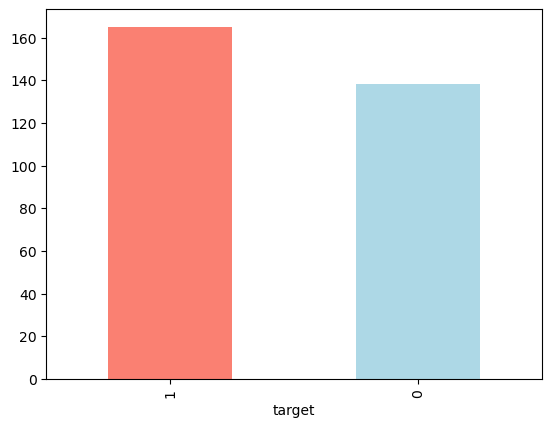

In [29]:
# Visualize
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [30]:
# basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
# Check if there are NaN or missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
# describe the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
# Heart Disease frequency vs sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [34]:
# target vs sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


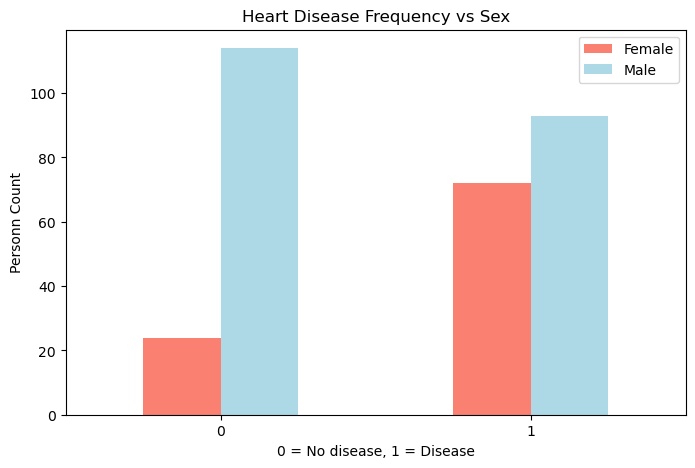

In [40]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(8,5), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Personn Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);